In [38]:
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.filter_approx import Heat_filter
import scanpy as sc
import matplotlib.pyplot as plt

In [39]:
n = 21
mid = int(n / 2)
graph = pygsp.graphs.Path(n)
graph.compute_laplacian(lap_type="normalized")
L = graph.L.toarray()
vec = np.zeros(L.shape[0])
vec[mid] = 1

In [40]:
filter = Heat_filter(graph, tau=10, method="mar", order=40)
filtered = filter(vec)

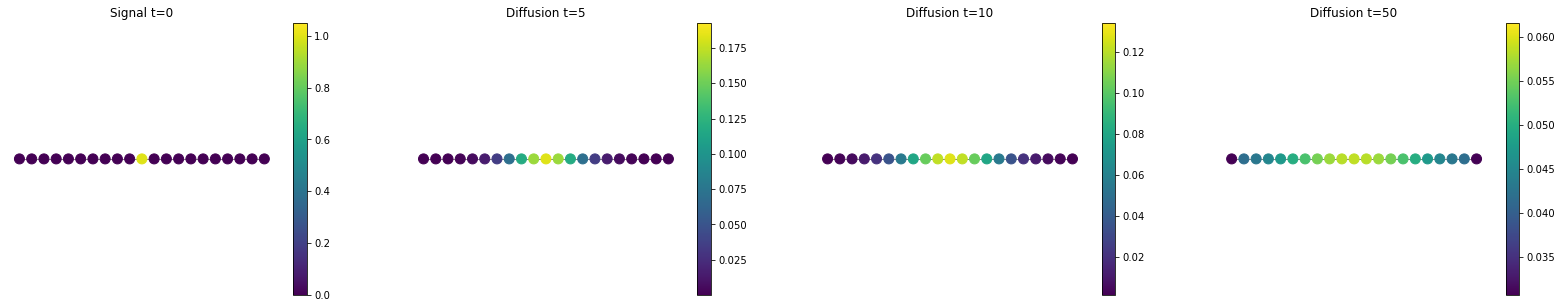

In [41]:
fig = plt.figure(figsize=(35, 5))
signals = [vec]
tau = [5,10,50]
for i in tau:
    signals.append(Heat_filter(graph, tau=i, method="mar", order=40)(vec))
for i in range(len(signals)):
    ax = fig.add_subplot(1, len(signals)+1, i+1)
    graph.plot_signal(signals[i], ax=ax, colorbar=True)
    ax.set_title(f"Diffusion t={tau[i-1]}") if i>0 else ax.set_title("Signal t=0")
    ax.axis("off")

In [42]:
filter = Heat_filter(graph, tau=10, method="mar", order=40)
filtered = filter(vec)

In [43]:
def heat_kernel(x,y,t):
    dist = np.abs(x-y)
    den = np.sqrt(4*np.pi*t)
    return (1/den)* np.exp((-dist**2)/(4*t))

def dist_from_heat(heat,t, sqrt=False, harnack_reg=False, idx=0):
    if sqrt:
        return np.sqrt(-4*t*np.log(heat+1e-16))
    elif harnack_reg:
        # sym_vol = (1/2)*(np.diag(heat)+np.diag(heat)[None,:])
        # print(sym_vol.shape)
        return -4*t*np.log(heat+1e-16) + 4*t*np.log(heat[idx]+1e-16)
    else:
        return -4*t*np.log(heat+1e-16)

exact
lowrank
mar
pygsp
euler


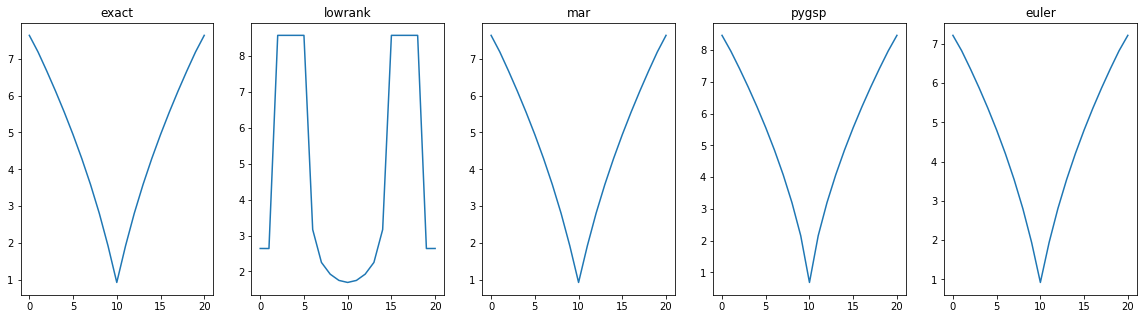

In [9]:
methods = ["exact", "lowrank", "mar", "pygsp", "euler"]
t = 0.5
rank = 5
order = 10
eye = np.eye(L.shape[0])

fig, axes = plt.subplots(1, len(methods), figsize=(20, 5))
for idx, method in enumerate(methods):
    print(method)
    K = rank if method == "lowrank" else order
    filter = Heat_filter(graph, t, K, method=method)
    heat = filter(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    dist = dist_from_heat(heat, t=t)
    axes[idx].plot(dist)
    axes[idx].set_title(method)
plt.show()

exact
lowrank
mar
pygsp
euler


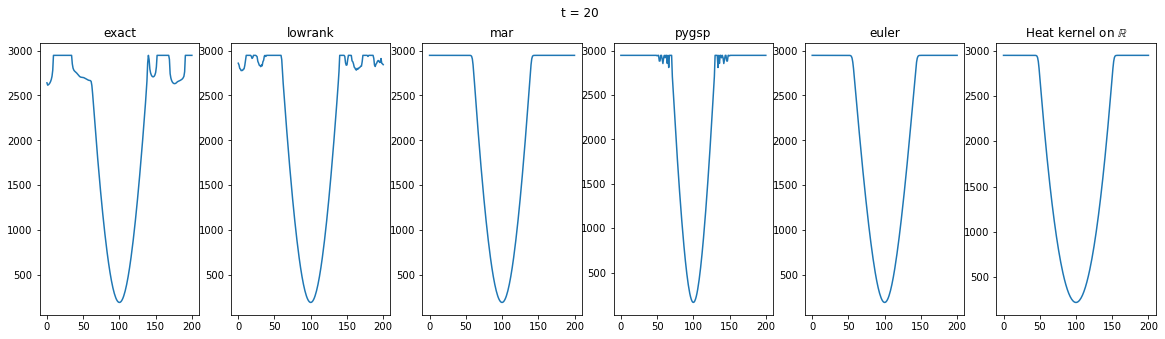

In [44]:
n = 201
mid = int(n / 2)
graph = pygsp.graphs.Path(n)
graph.compute_laplacian(lap_type="normalized")
L = graph.L.toarray()
vec = np.zeros(L.shape[0])
vec[mid] = 1

methods = ["exact", "lowrank", "mar", "pygsp", "euler"]
t = 20
rank = 150
order = 50
eye = np.eye(L.shape[0])

fig, axes = plt.subplots(1, len(methods)+1, figsize=(20, 5))
for idx, method in enumerate(methods):
    print(method)
    K = rank if method == "lowrank" else order
    filter = Heat_filter(graph, t, K, method=method)
    heat = filter(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    dist = dist_from_heat(heat, t=t)
    axes[idx].plot(dist)
    axes[idx].set_title(method)
geodesic = [np.abs(mid-y) for y in range(0,n)]
heat = np.array([heat_kernel(mid,y,t) for y in range(0,n)])
heat_dist = dist_from_heat(heat,t)
axes[-1].plot(heat_dist)
axes[-1].set_title("Heat kernel on $\mathbb{R}$")
fig.suptitle("t = {}".format(t))
plt.show()

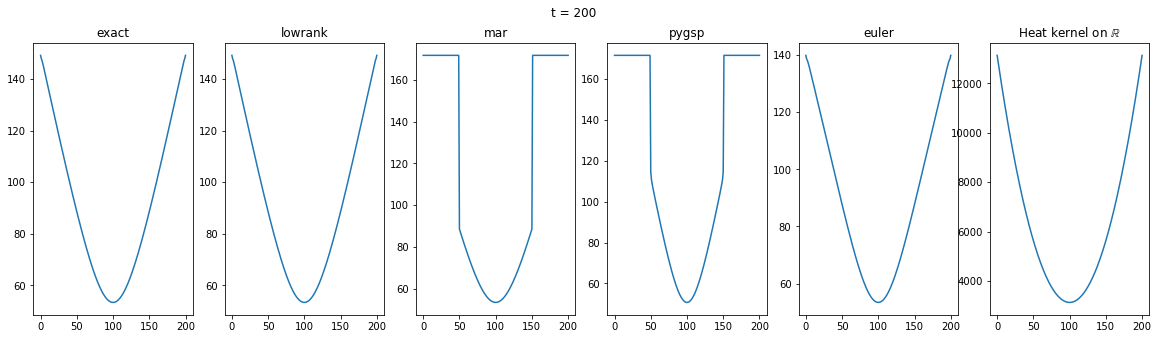

In [48]:
n = 201
mid = int(n / 2)
graph = pygsp.graphs.Path(n)
graph.compute_laplacian(lap_type="normalized")
L = graph.L.toarray()
vec = np.zeros(L.shape[0])
vec[mid] = 1

methods = ["exact", "lowrank", "mar", "pygsp", "euler"]
t = 200
rank = 150
order = 50
eye = np.eye(L.shape[0])

fig, axes = plt.subplots(1, len(methods)+1, figsize=(20, 5))
for idx, method in enumerate(methods):
    K = rank if method == "lowrank" else order
    filter = Heat_filter(graph, t, K, method=method)
    heat = filter(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    dist = dist_from_heat(heat, t=t, sqrt=True)
    axes[idx].plot(dist)
    axes[idx].set_title(method)
    ax.set_yticks([])
geodesic = [np.abs(mid-y) for y in range(0,n)]
heat = np.array([heat_kernel(mid,y,t) for y in range(0,n)])
heat_dist = dist_from_heat(heat,t)
axes[-1].plot(heat_dist)
axes[-1].set_title("Heat kernel on $\mathbb{R}$")
fig.suptitle("t = {}".format(t))
plt.show()

In [12]:
t = 10
K=20
heat_euler = Heat_Euler(L=graph.L, t=t, K=K)(vec)
dist_euler = dist_from_heat(heat_euler, t=t)

NameError: name 'Heat_Euler' is not defined

In [3]:
tau = np.linspace(10, 10, 2)
filt = pygsp.filters.Heat(graph, tau=tau)
heat_cheb = filt.filter(vec, order=40)
heat_cheb[heat_cheb < 0] = 0
multi_geo = [
    np.sqrt(-4 * tau[i] * np.log(heat_cheb[:, i] + 1e-16))
    for i in range(len(tau))
]
#weights = 1 - tau / tau.sum()
weights = np.ones(len(tau))/len(tau)
w_t = weights.sum()
weights = weights / w_t if w_t > 0 else None
dist_multi = np.average(multi_geo, axis=0, weights=weights)

NameError: name 'graph' is not defined

In [4]:
np.array(multi_geo).shape

NameError: name 'multi_geo' is not defined

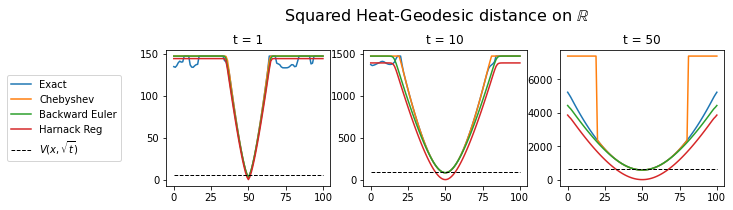

In [21]:
# Create a figure with three subplots for 3 different diffusion times t
# On each plot, plot the distance from the exact heat kernel and the distance from the Euler approximation and the mar approximation

import pandas as pd
import seaborn as sns

n = 101
mid = int(n / 2)
graph = pygsp.graphs.Path(n)
graph.compute_laplacian(lap_type="normalized")
L = graph.L.toarray()
vec = np.zeros(L.shape[0])
vec[mid] = 1

K = 30
eye = np.eye(L.shape[0])

# The contant term on the real line
cons = lambda t: 2*t*np.log(4*np.pi*t)

fig, axes = plt.subplots(1, 3, figsize=(10, 10/4))
for idx, t in enumerate([1,10,50]):
    results = {"Exact": "exact", "Chebyshev": "mar", "Backward Euler": "euler", "Harnack Reg": None}
    heat = Heat_filter(graph, t, K, method= results["Exact"])(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    results["Exact"] = dist_from_heat(heat, t=t)
    heat = Heat_filter(graph, t, K, method= results["Chebyshev"])(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    results["Chebyshev"] = dist_from_heat(heat, t=t)
    heat = Heat_filter(graph, t, K, method= results["Backward Euler"])(eye)
    heat[heat<0] = 0
    heat = heat[mid, :]
    results["Backward Euler"] = dist_from_heat(heat, t=t)
    results["Harnack Reg"] = dist_from_heat(heat,t=t, harnack_reg=True, idx=mid)
    for key, item in results.items():
        axes[idx].plot(item, label = key)
    axes[idx].hlines(cons(t), xmin=0, xmax=100, label = "$V(x,\sqrt{t})$", color="black", linestyle='dashed', linewidth=1)
    if idx == 0:
        axes[idx].legend(loc='center left', bbox_to_anchor=(-1, 0.5))
    axes[idx].set_title("t = {}".format(t))
fig.suptitle("Squared Heat-Geodesic distance on $\mathbb{R}$",size=16, y=1.12)
fig.savefig("../figures/squared_heat_geodesic_harnack_distance.png", dpi=400,  bbox_inches='tight')
